In [28]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv(r'C:\\sqlite\\mysql\\code\\AI\\selenium_webdriver\\selenium_webdriver.csv')

In [30]:
df['Review'] = df['Review'].str.replace('[^가-힣]',' ',regex= True)

In [31]:
import konlpy
kkma = konlpy.tag.Kkma()

nouns = df['Review'].apply(kkma.nouns)
nouns

0      [센과, 히, 행방, 행방불명, 불명, 느낌, 배, 배경도, 경도, 몇몇, 장면, ...
1                             [전작, 복잡, 하야, 하야오의, 오의, 신작]
2                                            [결국, 내, 인생]
3                  [영화, 전, 참고, 참고영상, 영상, 유, 유튜브, 튜브, 혹평]
4                                                     []
                             ...                        
595          [앙, 기모, 기모띠, 띠, 입, 입니디, 니디, 이해, 이해안, 안, 부분]
596                                          [노래, 만, 해용]
597                                               [잼, 요]
598             [내용, 난해, 한데, 개인적, 정, 앤딩, 가사, 영화, 의미, 함축]
599                                              [재미, 요]
Name: Review, Length: 600, dtype: object

In [32]:
nouns = nouns.explode()
nouns

0        센과
0         히
0        행방
0      행방불명
0        불명
       ... 
598      영화
598      의미
598      함축
599      재미
599       요
Name: Review, Length: 3669, dtype: object

In [33]:
df_word = pd.DataFrame({'word': nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,센과,2.0
0,행방,2.0
0,행방불명,4.0
0,불명,2.0
0,느낌,2.0
...,...,...
598,가사,2.0
598,영화,2.0
598,의미,2.0
598,함축,2.0


In [34]:
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
df_word

,word,count
546,영화,151
799,지브,97
387,생각,71
641,이해,70
148,내용,61
...,...,...
508,었느,1
509,엉망,1
510,에그지수가,1
511,에티켓,1


In [35]:
df_word = df_word.iloc[3:, :]
df_word.head()

,word,count
641,이해,70
148,내용,61
695,작품,45
138,난해,40
21,감독,37


In [36]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'이해': 70,
 '내용': 61,
 '작품': 45,
 '난해': 40,
 '감독': 37,
 '야자': 35,
 '기대': 33,
 '느낌': 32,
 '그대': 29,
 '미야자키': 29,
 '스토리': 26,
 '하야': 26,
 '해석': 25,
 '작화': 25,
 '그림': 24,
 '이야기': 24,
 '마지막': 21,
 '사람': 20,
 '무엇': 16,
 '영상미': 15,
 '의미': 14,
 '세계': 14,
 '영상': 14,
 '장면': 14,
 '정도': 14,
 '그림체': 13,
 '애니메이션': 13,
 '하다': 13,
 '감성': 13,
 '하야오': 13,
 '시간': 12,
 '제목': 12,
 '추천': 12,
 '호불호': 12,
 '부분': 12,
 '관람': 12,
 '볼만': 11,
 '난해하다': 10,
 '개인적': 10,
 '이것': 10,
 '현실': 9,
 '감동': 9,
 '인생': 9,
 '재미': 9,
 '걱정': 9,
 '초반': 9,
 '오랜만': 9,
 '고민': 8,
 '전쟁': 8,
 '이번': 8,
 '전체적': 8,
 '결국': 8,
 '이상': 8,
 '나름': 8,
 '마음': 8,
 '몰입': 8,
 '만큼': 8,
 '일본': 7,
 '표현': 7,
 '감동적': 7,
 '조금': 7,
 '배경': 7,
 '음악': 7,
 '철학적': 7,
 '분위기': 7,
 '중간': 7,
 '실망': 7,
 '노래': 6,
 '감상': 6,
 '오의': 6,
 '기분': 6,
 '엔딩': 6,
 '세상': 6,
 '아이': 6,
 '기존': 6,
 '보고': 6,
 '처음': 6,
 '할아버지': 6,
 '영화관': 6,
 '특유': 6,
 '후기': 6,
 '전달': 5,
 '그동안': 5,
 '필요': 5,
 '작가': 5,
 '다음': 5,
 '여운': 5,
 '혹평': 5,
 '연출': 5,
 '하야오의': 5,
 '메세지': 5,
 '이전': 5,
 '미야자키하야': 5,

In [40]:
import PIL
icon = PIL.Image.open('C:\\sqlite\\mysql\\code\\AI\\selenium_webdriver\\cloud.png')

img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

In [41]:
wc = WordCloud(random_state=123, font_path='malgun', width=400, height=400, background_color='pink', mask=img ,colormap = 'inferno')
img_wordcloud = wc.generate_from_frequencies(dic_word)

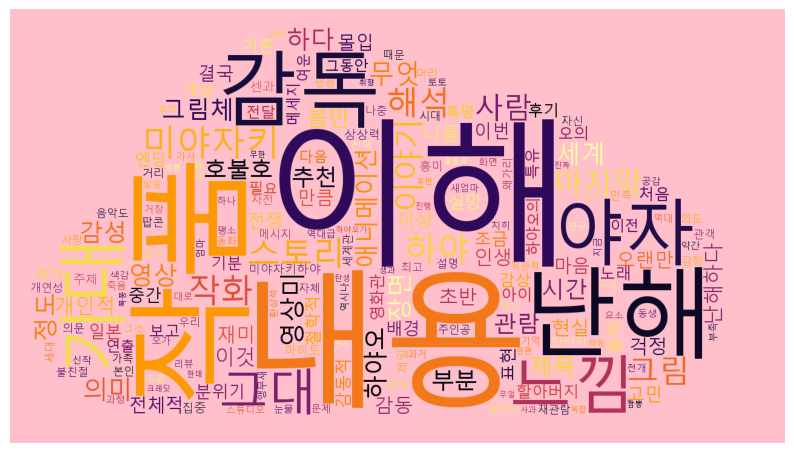

In [42]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.savefig('C:\\sqlite\\mysql\\code\\AI\\selenium_webdriver\\save.png')